<a href="https://colab.research.google.com/github/cedamusk/AI-N-ML/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports
This section imports the necessary libraries and modules for the decision tree implementation

`numpy`: Used for numerical computations.
`matplotlib.pyplot`: Used for data visualization.
`make_classifiation`: Generates a synthetic dataset for classification.
`train_test_split`: Splits the dataset into training and testing subsets.
`DecisionTreeClassifier`: Implements the decision tree algorithm for classification.
`plot_tree`: Visualizes the structure of the decision tree

**Evaluation Metrics**

`accuracy_score`: Computes prediction accuracy.
`precision_score`: Computes the precision.
`recall_score`: Computes recall.
`f1_score`: Computes the F1 Score.
`confusion_matrix`: Generates a confusion matrix.
`classification_report`: Provides a summary of classification metrics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import(accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)

## Setting the Random Seed
This line sets the random seed for NumPy's random number generator to ensure reproducibility. by fixing the seed, the random numbers generated by the program will always be the same every time the code is run, which is crucial for debugging and consistent results.

The number `42` is a nod to the *Hitchhiker's Guide to the Galaxy* where 42 is the "the answer to life, the universe, and everything" but any other integer can be used in its place.

In [2]:
np.random.seed(42)

## Function: `generate_synthetic_data`

Generates a synthetic dataset for binary classification problem using `make_classification` from `sklearn.datasets`.

**Parameters**
`n_samples`: (int, defaullt=300): The total number of samples in the dataset.

`n_features`(int, default=5): The total number of features for each sample.

`n_informative` (int, default=3): The number of informative features (useful for prediction).

`n_redundant` (int, default=1): The number of redundant features (random linear combinations of informative features).

`random_state` (int, default=42): The seed for the random number generator to ensure reproducibility.

**Returns**

`X` (numpy.ndarray): A 2D array of shape `(n_samples, n_features)` containing the feature values.

`y` (numpy.ndarray): A 1D array of shape `(n_samples,)` containing the target labels (0, or 1).



In [3]:
def generate_synthetic_data(n_samples=300, n_features=5, n_informative=3, n_redundant=1, random_state=42):
  X, y=make_classification(
      n_samples=n_samples,
      n_features=n_features,
      n_informative=n_informative,
      n_redundant=n_redundant,
      n_classes=2,
      random_state=random_state

  )

  return X, y


In [4]:
X, y=generate_synthetic_data()
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
dt_classifier=DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=10,
    random_state=42
)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)

In [6]:
y_pred=dt_classifier.predict(X_test)

In [7]:
print("Model Performance Metrics:")
print("-"*30)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

Model Performance Metrics:
------------------------------
Accuracy: 0.7500
Precision: 0.7097
Recall : 0.7857
F1 Score: 0.7458


In [8]:
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.71      0.79      0.75        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



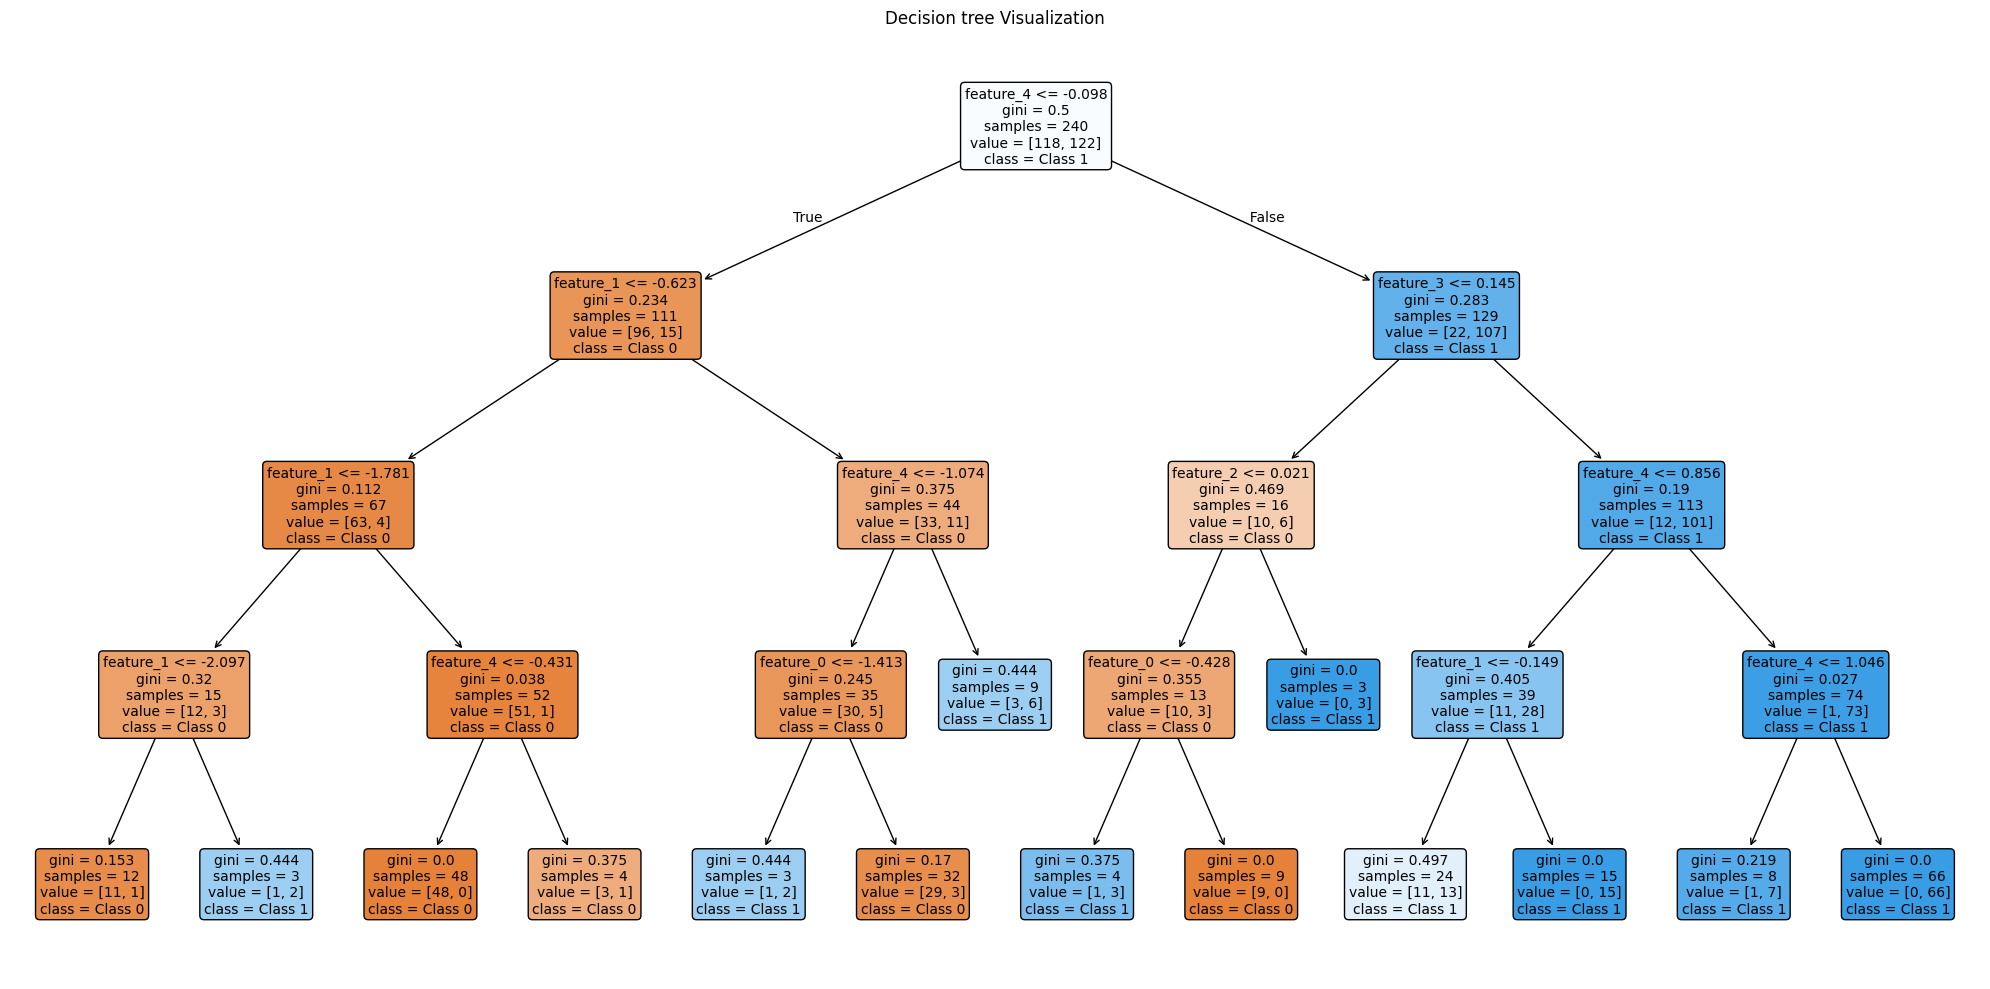

In [9]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier,
          feature_names=[f'feature_{i}' for i in range(X.shape[1])],
          class_names=['Class 0', 'Class 1'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision tree Visualization")
plt.tight_layout()
plt.show()

In [10]:
feature_importance=dt_classifier.feature_importances_
feature_names=[f'feature_{i}' for i in range(X.shape[1])]

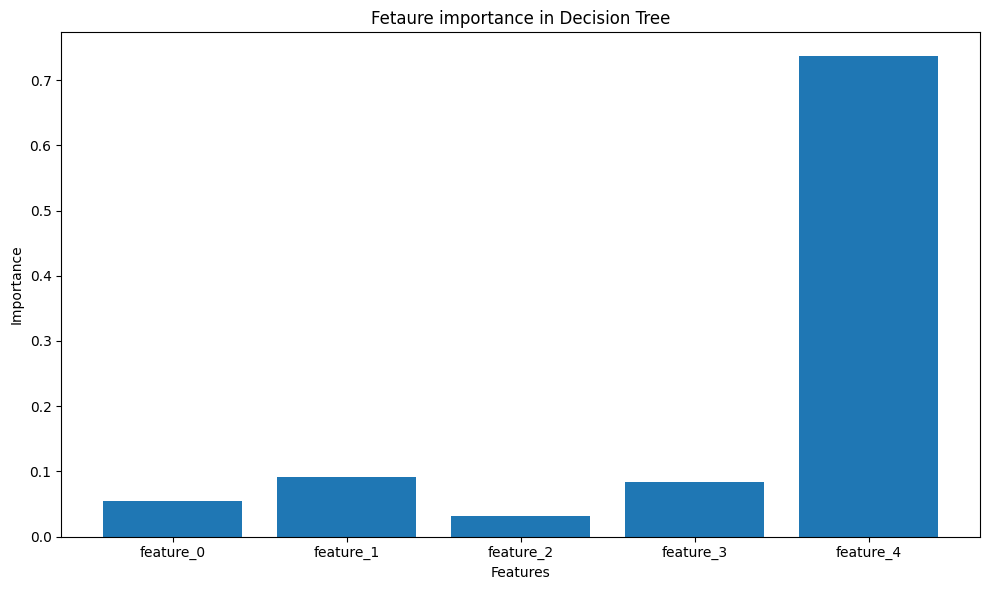

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title("Fetaure importance in Decision Tree")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()